In [175]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [176]:
### main dataset ###
data = pd.read_csv("20151219.txt", sep = "\t", header = None)
data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

# slice dataset up to attack flag column, drop additional features
data = data.loc[:, :'attack_flag']

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

-1    149915
 1     67713
Name: attack_flag, dtype: int64

In [177]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,OTH,-1
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,-1
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,-1
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,-1
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,1.0,1.0,1.0,S0,-1
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,-1
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1


In [178]:
data.shape

(217628, 15)

In [179]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag
count,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000
mean,0.855259,56.899333,122.064555,2.952263,0.417481,0.089564,0.542215,29.491720,31.876730,0.071694,0.066464,0.146028,-0.377718
std,3.085410,519.846915,748.123612,5.519918,0.491905,0.284547,0.467622,44.351499,43.928101,0.256081,0.248495,0.350052,0.925923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
75%,0.013333,45.000000,61.000000,5.000000,1.000000,0.000000,1.000000,96.000000,96.000000,0.000000,0.000000,0.000000,1.000000
max,563.012764,88066.000000,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 15 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
dtypes: float64(7), int64(6), object(2)
memory usage: 24.9+ MB


In [181]:
data["Conn state"].value_counts(dropna=False)

S0        127464
SF         59944
RSTO       11476
OTH         8640
REJ         7998
RSTRH        733
RSTOS0       634
SHR          381
RSTR         304
S1            52
SH             2
Name: Conn state, dtype: int64

In [182]:
data["service"].value_counts(dropna=False)

other    126080
dns       61990
sip       16519
ssh       11518
snmp        665
smtp        495
rdp         328
dhcp         20
http         11
ssl           2
Name: service, dtype: int64

In [183]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for proto - commented due to reduced column number
# data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
# data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,...,0,0,0,0,0,1,0,0,0,0
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [184]:
data.shape

(217628, 36)

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 36 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
is_dhcp                        217628 non-null uint8
is_dns                   

## Data visualization

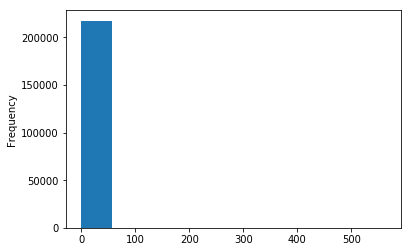

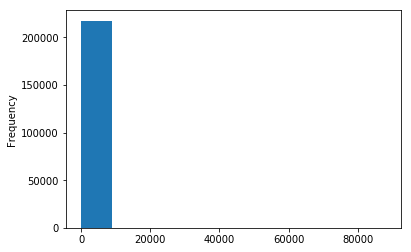

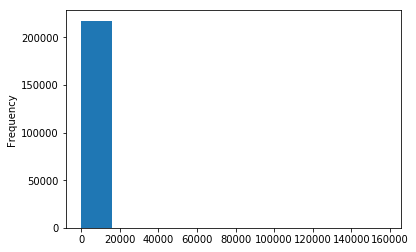

In [186]:
# hisotgrams
# data[data.column > 1000]
data['conn len'].plot('hist')
plt.show()
data['src bytes'].plot('hist')
plt.show()
data['dst bytes'].plot('hist')
plt.show()

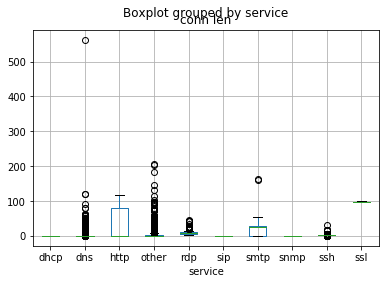

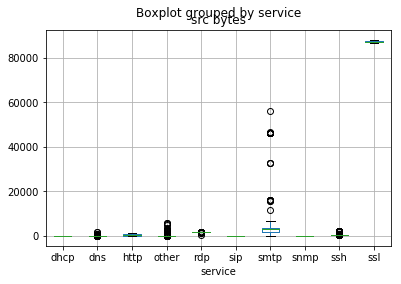

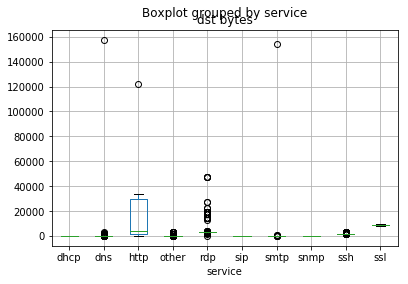

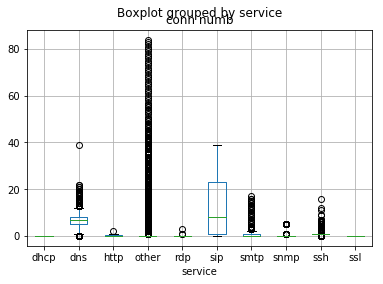

In [187]:
# boxplots
data.boxplot(column='conn len', by='service')
data.boxplot(column='src bytes', by='service')
data.boxplot(column='dst bytes', by='service')
data.boxplot(column='conn numb', by='service')

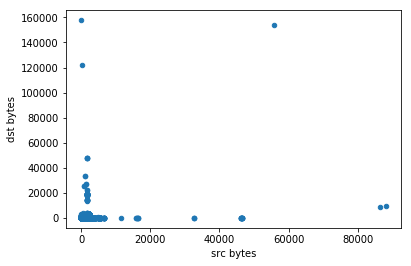

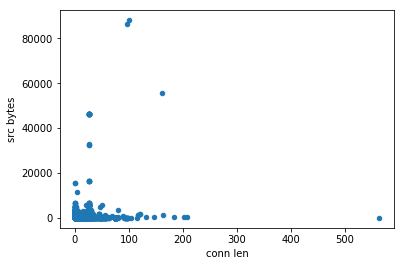

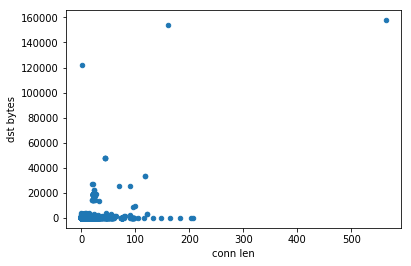

In [188]:
# scatter plots
data.plot.scatter(x='src bytes', y= 'dst bytes')
data.plot.scatter(x='conn len', y= 'src bytes')
data.plot.scatter(x='conn len', y= 'dst bytes')

In [189]:
### drop categorical columns ####

data = data.drop(["service", "Conn state"], axis=1)

# Training and testing set preparation

In [190]:
data.shape

(217628, 34)

In [191]:
### training dataset - make the dataset binary one ###
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1

In [192]:
# plotting method definition

def plot_stats(stat, name):
    fig, ax = plt.subplots(figsize=(7, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=35)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

In [193]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter

import matplotlib.pyplot as plt

sampled_data = data.sample(n=10000, random_state=1)


X = sampled_data.loc[:, sampled_data.columns != 'attack_flag']
y = sampled_data.loc[:, sampled_data.columns == 'attack_flag'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


seed = 12

print(Counter(y_test))
print(Counter(y_train))

Counter({1: 2051, -1: 949})
Counter({1: 4870, -1: 2130})


# Decision Tree parameters selection

## Checking different parameters impact

In [194]:
classifiers = {
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_ent_5":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 5),
               "DecisionTree_ent_7":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 7),
               "DecisionTree_5":DecisionTreeClassifier(random_state=0, max_depth = 5),
               "DecisionTree_7":DecisionTreeClassifier(random_state=0, max_depth = 7),
               "DecisionTree_ent":DecisionTreeClassifier(random_state=0, criterion = "entropy")

}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: DecisionTree Accuracy: 0.99300, F1-score: 0.99491, Precision: 0.98986, Recall: 1.00000, FPR: 0.02213
TN: 928; FP:  21; FN:    0; TP: 2051

Algorithm: DecisionTree_ent_5 Accuracy: 0.99333, F1-score: 0.99515, Precision: 0.99082, Recall: 0.99951, FPR: 0.02002
TN: 930; FP:  19; FN:    1; TP: 2050

Algorithm: DecisionTree_ent_7 Accuracy: 0.99367, F1-score: 0.99539, Precision: 0.99082, Recall: 1.00000, FPR: 0.02002
TN: 930; FP:  19; FN:    0; TP: 2051

Algorithm: DecisionTree_5 Accuracy: 0.99333, F1-score: 0.99515, Precision: 0.99082, Recall: 0.99951, FPR: 0.02002
TN: 930; FP:  19; FN:    1; TP: 2050

Algorithm: DecisionTree_7 Accuracy: 0.99333, F1-score: 0.99515, Precision: 0.99082, Recall: 0.99951, FPR: 0.02002
TN: 930; FP:  19; FN:    1; TP: 2050

Algorithm: DecisionTree_ent Accuracy: 0.99000, F1-score: 0.99274, Precision: 0.98605, Recall: 0.99951, FPR: 0.03056
TN: 920; FP:  29; FN:    1; TP: 2050



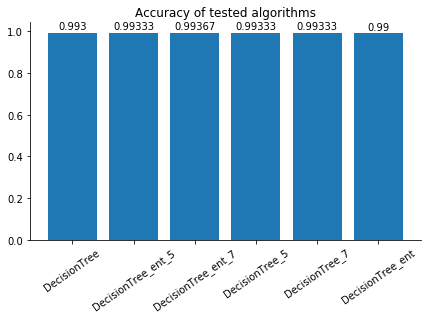

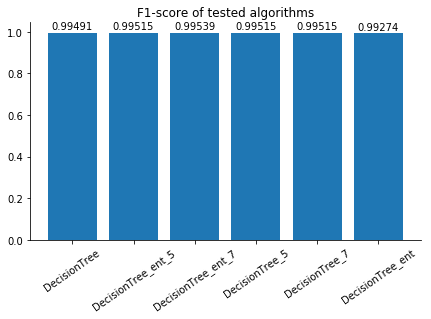

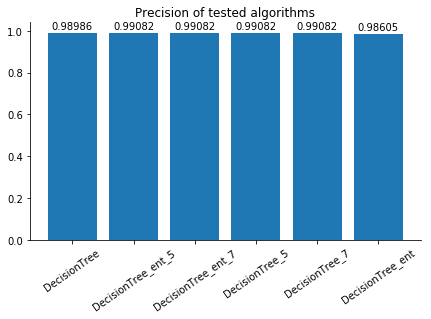

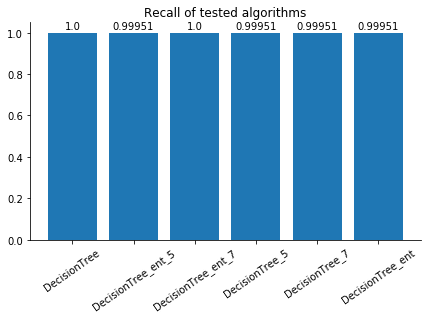

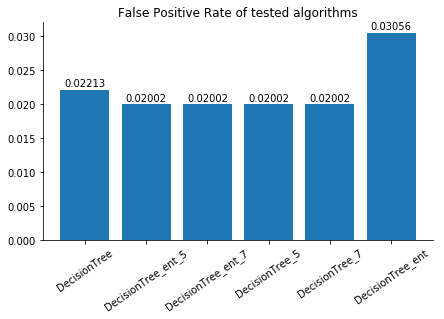

In [195]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## Checking tree depth impact

In [196]:
# plotting method definition

def plot_stats2(stat, name):
    fig, ax = plt.subplots(figsize=(8, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=35)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

In [197]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}


for depth in range(1,11):

    classifiers = {
                   "DecisionTree":DecisionTreeClassifier(random_state=0, max_depth = depth)
    }



    #for name, clf in classifiers.items():
    name = "DCT" + "_" + str(depth)
    model = classifiers["DecisionTree"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: DCT_1        Accuracy: 0.98033, F1-score: 0.98580, Precision: 0.97338, Recall: 0.99854, FPR: 0.05901
TN: 893; FP:  56; FN:    3; TP: 2048

Algorithm: DCT_2        Accuracy: 0.98100, F1-score: 0.98629, Precision: 0.97341, Recall: 0.99951, FPR: 0.05901
TN: 893; FP:  56; FN:    1; TP: 2050

Algorithm: DCT_3        Accuracy: 0.98633, F1-score: 0.98998, Precision: 0.99216, Recall: 0.98781, FPR: 0.01686
TN: 933; FP:  16; FN:   25; TP: 2026

Algorithm: DCT_4        Accuracy: 0.99133, F1-score: 0.99368, Precision: 0.99127, Recall: 0.99610, FPR: 0.01897
TN: 931; FP:  18; FN:    8; TP: 2043

Algorithm: DCT_5        Accuracy: 0.99333, F1-score: 0.99515, Precision: 0.99082, Recall: 0.99951, FPR: 0.02002
TN: 930; FP:  19; FN:    1; TP: 2050

Algorithm: DCT_6        Accuracy: 0.99367, F1-score: 0.99539, Precision: 0.99082, Recall: 1.00000, FPR: 0.02002
TN: 930; FP:  19; FN:    0; TP: 2051

Algorithm: DCT_7        Accuracy: 0.99333, F1-score: 0.99515, Precision: 0.99082, Recall: 0.99951, F

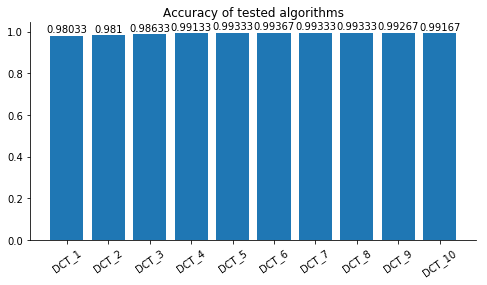

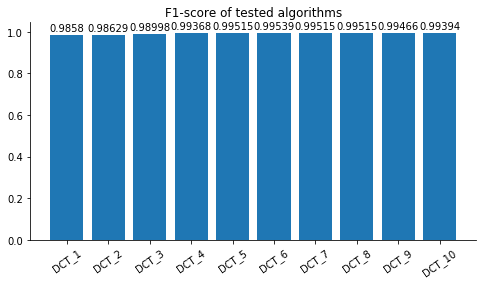

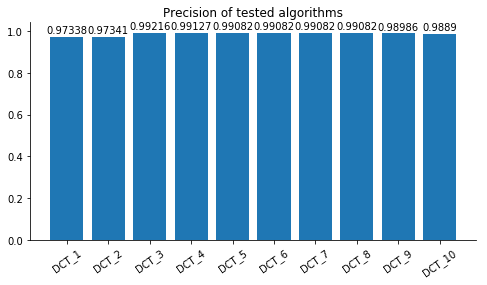

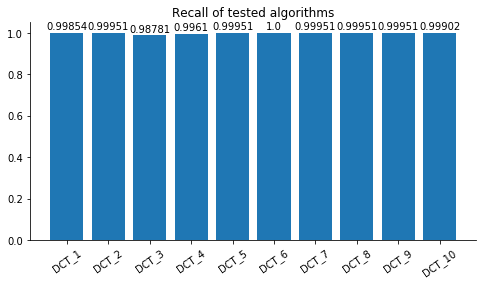

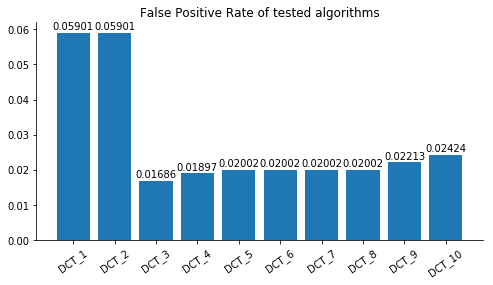

In [198]:
plot_stats2(Acc, "Accuracy")
plot_stats2(F1S, "F1-score")
plot_stats2(Prec, "Precision")
plot_stats2(Rec, "Recall")
plot_stats2(FPR, "False Positive Rate")

In [199]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter

import matplotlib.pyplot as plt


# zmiana n_estimators daje poprawe
# kfold tylko dla crossvalidation
# learning rate [1 - default] najlepsze wyniki

classifiers = {
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_7":DecisionTreeClassifier(random_state=0, max_depth = 7),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: DecisionTree Accuracy: 0.99300, F1-score: 0.99491, Precision: 0.98986, Recall: 1.00000, FPR: 0.02213
TN: 928; FP:  21; FN:    0; TP: 2051

Algorithm: DecisionTree_7 Accuracy: 0.99333, F1-score: 0.99515, Precision: 0.99082, Recall: 0.99951, FPR: 0.02002
TN: 930; FP:  19; FN:    1; TP: 2050



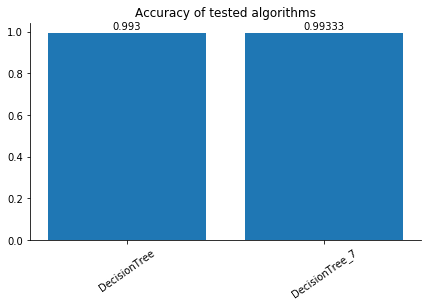

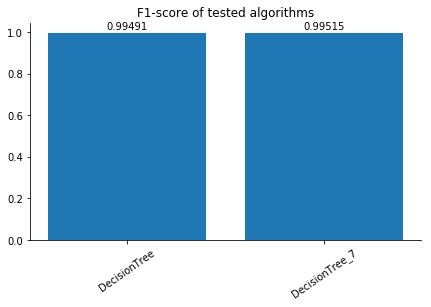

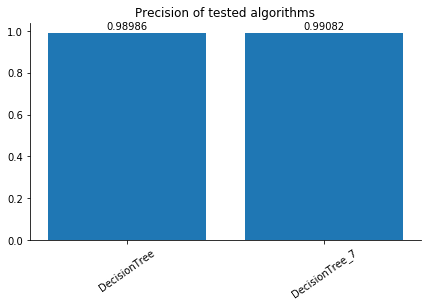

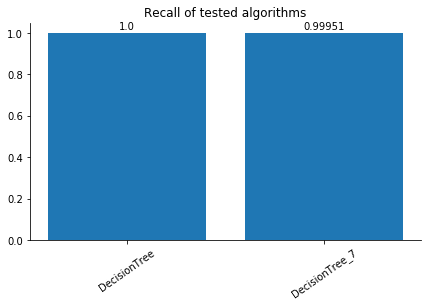

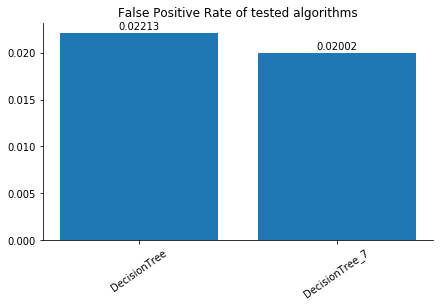

In [200]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## AdaBoost parameters selection

In [222]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for num_trees in range(2,253,10):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7, random_state=0), n_estimators=num_trees),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "Adaboost" + "_" + str(num_trees)
    model = classifiers["AdaBoost"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: Adaboost_2   Accuracy: 0.99133, F1-score: 0.99370, Precision: 0.98842, Recall: 0.99902, FPR: 0.02529
TN: 925; FP:  24; FN:    2; TP: 2049

Algorithm: Adaboost_12  Accuracy: 0.99267, F1-score: 0.99467, Precision: 0.98939, Recall: 1.00000, FPR: 0.02318
TN: 927; FP:  22; FN:    0; TP: 2051

Algorithm: Adaboost_22  Accuracy: 0.99200, F1-score: 0.99418, Precision: 0.98843, Recall: 1.00000, FPR: 0.02529
TN: 925; FP:  24; FN:    0; TP: 2051

Algorithm: Adaboost_32  Accuracy: 0.99333, F1-score: 0.99515, Precision: 0.99082, Recall: 0.99951, FPR: 0.02002
TN: 930; FP:  19; FN:    1; TP: 2050

Algorithm: Adaboost_42  Accuracy: 0.99300, F1-score: 0.99491, Precision: 0.98986, Recall: 1.00000, FPR: 0.02213
TN: 928; FP:  21; FN:    0; TP: 2051

Algorithm: Adaboost_52  Accuracy: 0.99300, F1-score: 0.99490, Precision: 0.99034, Recall: 0.99951, FPR: 0.02107
TN: 929; FP:  20; FN:    1; TP: 2050

Algorithm: Adaboost_62  Accuracy: 0.99200, F1-score: 0.99418, Precision: 0.98890, Recall: 0.99951, F

In [248]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for num_trees in range(2,253,10):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "AdaBoost":AdaBoostClassifier(n_estimators=num_trees),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "Adaboost" + "_" + str(num_trees)
    model = classifiers["AdaBoost"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: Adaboost_2   Accuracy: 0.98033, F1-score: 0.98580, Precision: 0.97338, Recall: 0.99854, FPR: 0.05901
TN: 893; FP:  56; FN:    3; TP: 2048

Algorithm: Adaboost_12  Accuracy: 0.98933, F1-score: 0.99224, Precision: 0.98745, Recall: 0.99707, FPR: 0.02740
TN: 923; FP:  26; FN:    6; TP: 2045

Algorithm: Adaboost_22  Accuracy: 0.99067, F1-score: 0.99321, Precision: 0.98794, Recall: 0.99854, FPR: 0.02634
TN: 924; FP:  25; FN:    3; TP: 2048

Algorithm: Adaboost_32  Accuracy: 0.99100, F1-score: 0.99345, Precision: 0.98795, Recall: 0.99902, FPR: 0.02634
TN: 924; FP:  25; FN:    2; TP: 2049

Algorithm: Adaboost_42  Accuracy: 0.99233, F1-score: 0.99442, Precision: 0.98938, Recall: 0.99951, FPR: 0.02318
TN: 927; FP:  22; FN:    1; TP: 2050

Algorithm: Adaboost_52  Accuracy: 0.99233, F1-score: 0.99442, Precision: 0.98986, Recall: 0.99902, FPR: 0.02213
TN: 928; FP:  21; FN:    2; TP: 2049

Algorithm: Adaboost_62  Accuracy: 0.99233, F1-score: 0.99442, Precision: 0.98986, Recall: 0.99902, F

In [243]:
num_trees = 122

classifiers = {
               "AdaBoost_n_est_dct_rs":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_dct_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees, random_state = 0),
               "AdaBoost_n_est_dct_def":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees),
               "AdaBoost_n_est":AdaBoostClassifier(n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(n_estimators=num_trees, random_state = 0), 
               "AdaBoost_orig":AdaBoostClassifier()
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: AdaBoost_n_est_dct_rs Accuracy: 0.99300, F1-score: 0.99491, Precision: 0.98986, Recall: 1.00000, FPR: 0.02213
TN: 928; FP:  21; FN:    0; TP: 2051

Algorithm: AdaBoost_n_est_dct_0 Accuracy: 0.99367, F1-score: 0.99539, Precision: 0.99082, Recall: 1.00000, FPR: 0.02002
TN: 930; FP:  19; FN:    0; TP: 2051

Algorithm: AdaBoost_n_est_dct_def Accuracy: 0.99367, F1-score: 0.99539, Precision: 0.99082, Recall: 1.00000, FPR: 0.02002
TN: 930; FP:  19; FN:    0; TP: 2051

Algorithm: AdaBoost_n_est Accuracy: 0.99300, F1-score: 0.99490, Precision: 0.99034, Recall: 0.99951, FPR: 0.02107
TN: 929; FP:  20; FN:    1; TP: 2050

Algorithm: AdaBoost_n_est_0 Accuracy: 0.99300, F1-score: 0.99490, Precision: 0.99034, Recall: 0.99951, FPR: 0.02107
TN: 929; FP:  20; FN:    1; TP: 2050

Algorithm: AdaBoost_orig Accuracy: 0.99200, F1-score: 0.99418, Precision: 0.98938, Recall: 0.99902, FPR: 0.02318
TN: 927; FP:  22; FN:    2; TP: 2049



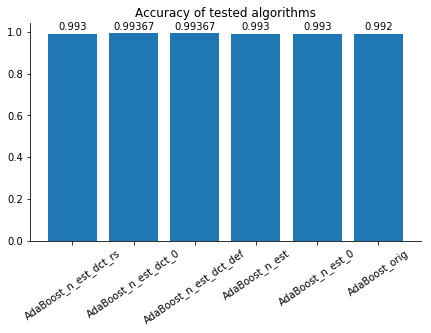

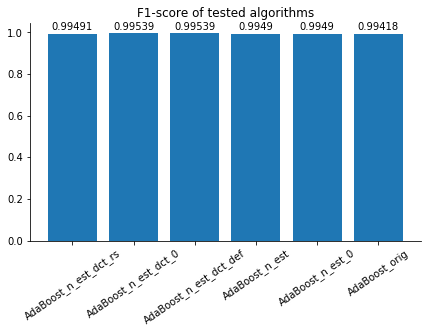

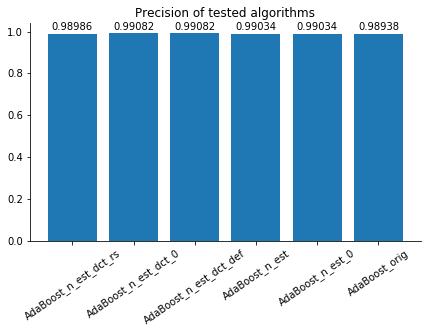

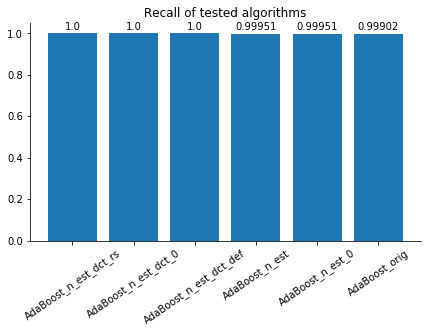

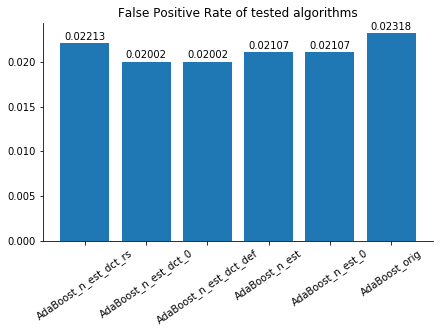

In [244]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## Random tree parameters selection

In [258]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}


for depth in range(1,31):

    classifiers = {

                   "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = depth)
    }



    #for name, clf in classifiers.items():
    name = "RT" + "_" + str(depth)
    model = classifiers["RandomTree"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RT_1         Accuracy: 0.97433, F1-score: 0.98138, Precision: 0.97361, Recall: 0.98927, FPR: 0.05796
TN: 894; FP:  55; FN:   22; TP: 2029

Algorithm: RT_2         Accuracy: 0.97967, F1-score: 0.98531, Precision: 0.97336, Recall: 0.99756, FPR: 0.05901
TN: 893; FP:  56; FN:    5; TP: 2046

Algorithm: RT_3         Accuracy: 0.98067, F1-score: 0.98604, Precision: 0.97340, Recall: 0.99902, FPR: 0.05901
TN: 893; FP:  56; FN:    2; TP: 2049

Algorithm: RT_4         Accuracy: 0.98000, F1-score: 0.98555, Precision: 0.97382, Recall: 0.99756, FPR: 0.05796
TN: 894; FP:  55; FN:    5; TP: 2046

Algorithm: RT_5         Accuracy: 0.98633, F1-score: 0.99009, Precision: 0.98178, Recall: 0.99854, FPR: 0.04004
TN: 911; FP:  38; FN:    3; TP: 2048

Algorithm: RT_6         Accuracy: 0.98667, F1-score: 0.99026, Precision: 0.98882, Recall: 0.99171, FPR: 0.02424
TN: 926; FP:  23; FN:   17; TP: 2034

Algorithm: RT_7         Accuracy: 0.98133, F1-score: 0.98653, Precision: 0.97387, Recall: 0.99951, F

In [262]:
classifiers = {
                "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                "RandomTree_21":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 21),
                
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: RandomTree   Accuracy: 0.99167, F1-score: 0.99393, Precision: 0.98937, Recall: 0.99854, FPR: 0.02318
TN: 927; FP:  22; FN:    3; TP: 2048

Algorithm: RandomTree_21 Accuracy: 0.99167, F1-score: 0.99393, Precision: 0.98937, Recall: 0.99854, FPR: 0.02318
TN: 927; FP:  22; FN:    3; TP: 2048



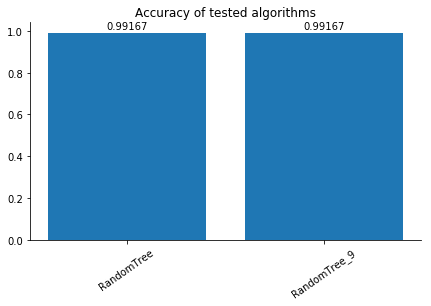

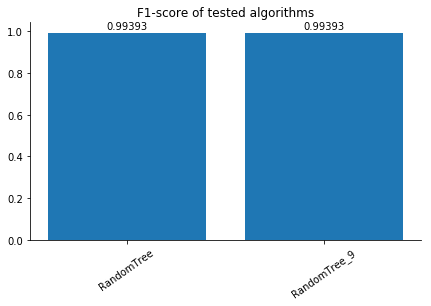

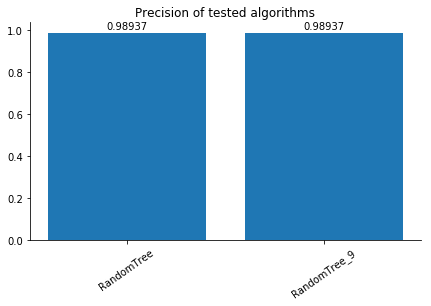

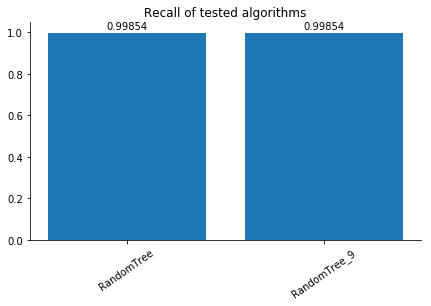

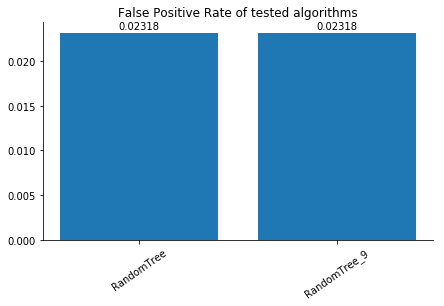

In [261]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## Random Forest parameters selection

In [270]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for num_trees in range(2,253,10):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "RandomForest":RandomForestClassifier(n_estimators=num_trees, random_state=0),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "RF" + "_" + str(num_trees)
    model = classifiers["RandomForest"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RF_2         Accuracy: 0.99067, F1-score: 0.99318, Precision: 0.99221, Recall: 0.99415, FPR: 0.01686
TN: 933; FP:  16; FN:   12; TP: 2039

Algorithm: RF_12        Accuracy: 0.99267, F1-score: 0.99466, Precision: 0.98986, Recall: 0.99951, FPR: 0.02213
TN: 928; FP:  21; FN:    1; TP: 2050

Algorithm: RF_22        Accuracy: 0.99300, F1-score: 0.99490, Precision: 0.99034, Recall: 0.99951, FPR: 0.02107
TN: 929; FP:  20; FN:    1; TP: 2050

Algorithm: RF_32        Accuracy: 0.99367, F1-score: 0.99539, Precision: 0.99082, Recall: 1.00000, FPR: 0.02002
TN: 930; FP:  19; FN:    0; TP: 2051

Algorithm: RF_42        Accuracy: 0.99367, F1-score: 0.99539, Precision: 0.99082, Recall: 1.00000, FPR: 0.02002
TN: 930; FP:  19; FN:    0; TP: 2051

Algorithm: RF_52        Accuracy: 0.99333, F1-score: 0.99515, Precision: 0.99034, Recall: 1.00000, FPR: 0.02107
TN: 929; FP:  20; FN:    0; TP: 2051

Algorithm: RF_62        Accuracy: 0.99300, F1-score: 0.99491, Precision: 0.98986, Recall: 1.00000, F

In [271]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for depth in range(1,31):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "RandomForest":RandomForestClassifier(n_estimators=32, random_state=0, max_depth = depth),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "RF" + "_" + str(depth)
    model = classifiers["RandomForest"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RF_1         Accuracy: 0.98100, F1-score: 0.98618, Precision: 0.98071, Recall: 0.99171, FPR: 0.04215
TN: 909; FP:  40; FN:   17; TP: 2034

Algorithm: RF_2         Accuracy: 0.97933, F1-score: 0.98507, Precision: 0.97335, Recall: 0.99707, FPR: 0.05901
TN: 893; FP:  56; FN:    6; TP: 2045

Algorithm: RF_3         Accuracy: 0.98233, F1-score: 0.98722, Precision: 0.97662, Recall: 0.99805, FPR: 0.05163
TN: 900; FP:  49; FN:    4; TP: 2047

Algorithm: RF_4         Accuracy: 0.98633, F1-score: 0.99008, Precision: 0.98271, Recall: 0.99756, FPR: 0.03793
TN: 913; FP:  36; FN:    5; TP: 2046

Algorithm: RF_5         Accuracy: 0.98733, F1-score: 0.99081, Precision: 0.98273, Recall: 0.99902, FPR: 0.03793
TN: 913; FP:  36; FN:    2; TP: 2049

Algorithm: RF_6         Accuracy: 0.99167, F1-score: 0.99394, Precision: 0.98843, Recall: 0.99951, FPR: 0.02529
TN: 925; FP:  24; FN:    1; TP: 2050

Algorithm: RF_7         Accuracy: 0.99167, F1-score: 0.99394, Precision: 0.98843, Recall: 0.99951, F

In [272]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

num_trees = 182
seed = 12

classifiers = {
                "RandomForest":RandomForestClassifier(n_estimators=32, max_depth=22, random_state=0),
                "RandomForest_orig":RandomForestClassifier(),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RandomForest Accuracy: 0.99367, F1-score: 0.99539, Precision: 0.99082, Recall: 1.00000, FPR: 0.02002
TN: 930; FP:  19; FN:    0; TP: 2051

Algorithm: RandomForest_orig Accuracy: 0.99367, F1-score: 0.99539, Precision: 0.99130, Recall: 0.99951, FPR: 0.01897
TN: 931; FP:  18; FN:    1; TP: 2050



/home/matz/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


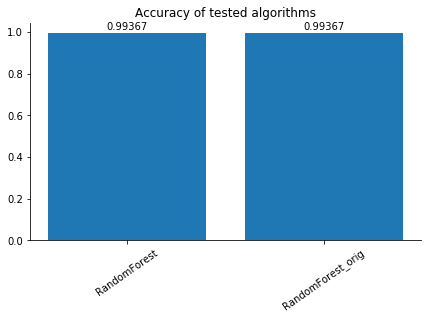

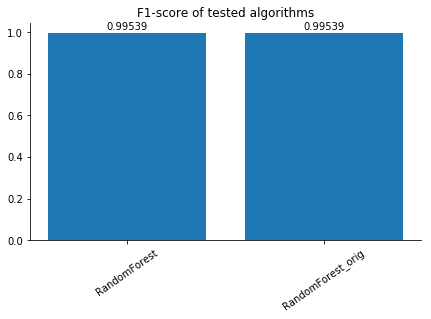

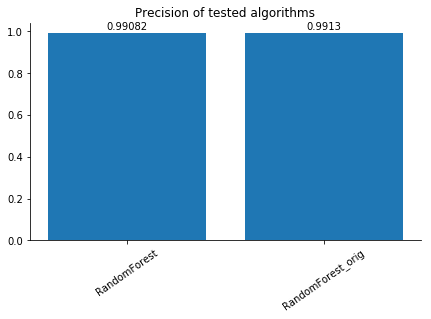

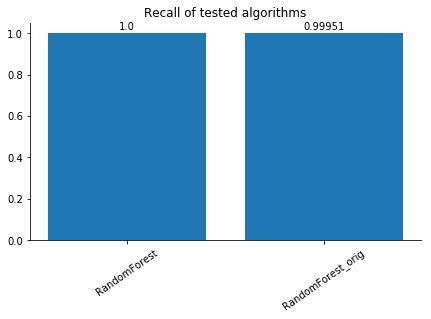

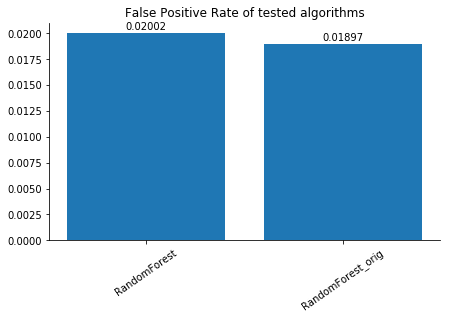

In [273]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

# Algorithms' performance comparison

In [275]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

num_trees = 182
seed = 12

classifiers = {"AdaBoost":AdaBoostClassifier(n_estimators=182, random_state=seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_7":DecisionTreeClassifier(random_state=0, max_depth = 7),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomTree_21":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 21),
               "RandomForest":RandomForestClassifier(),
               "RandomForest_np":RandomForestClassifier(n_estimators=32, max_depth=22, random_state=0)
               }

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.99333, F1-score: 0.99515, Precision: 0.99034, Recall: 1.00000, FPR: 0.02107
TN: 929; FP:  20; FN:    0; TP: 2051

Algorithm: AdaBoost_n_est_0 Accuracy: 0.99367, F1-score: 0.99539, Precision: 0.99082, Recall: 1.00000, FPR: 0.02002
TN: 930; FP:  19; FN:    0; TP: 2051

Algorithm: DecisionTree Accuracy: 0.99300, F1-score: 0.99491, Precision: 0.98986, Recall: 1.00000, FPR: 0.02213
TN: 928; FP:  21; FN:    0; TP: 2051

Algorithm: DecisionTree_7 Accuracy: 0.99333, F1-score: 0.99515, Precision: 0.99082, Recall: 0.99951, FPR: 0.02002
TN: 930; FP:  19; FN:    1; TP: 2050

Algorithm: NaiveBayes   Accuracy: 0.98167, F1-score: 0.98651, Precision: 0.99260, Recall: 0.98050, FPR: 0.01581
TN: 934; FP:  15; FN:   40; TP: 2011

Algorithm: RandomTree   Accuracy: 0.99167, F1-score: 0.99393, Precision: 0.98937, Recall: 0.99854, FPR: 0.02318
TN: 927; FP:  22; FN:    3; TP: 2048

Algorithm: RandomTree_21 Accuracy: 0.99167, F1-score: 0.99393, Precision: 0.98937, Recall: 0.9

/home/matz/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


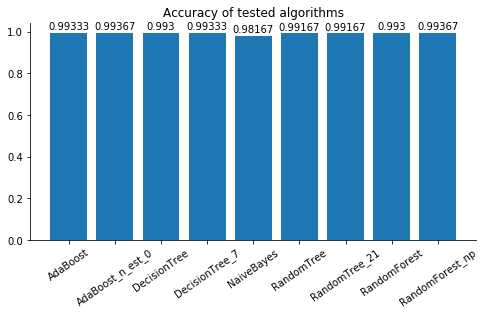

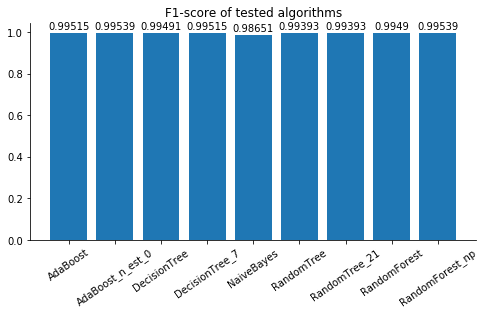

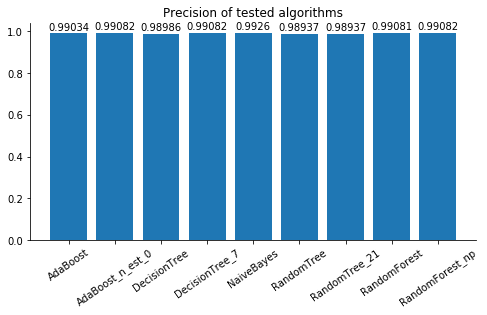

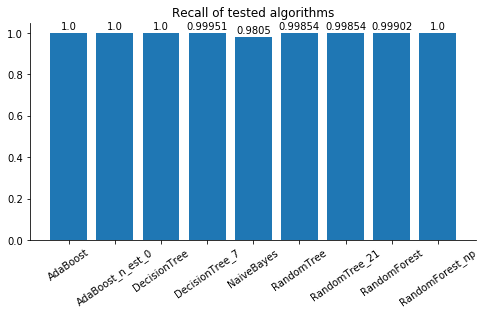

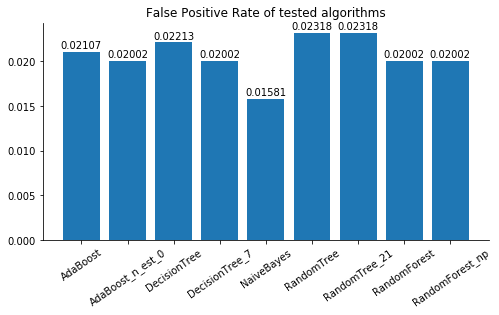

In [277]:
plot_stats2(Acc, "Accuracy")
plot_stats2(F1S, "F1-score")
plot_stats2(Prec, "Precision")
plot_stats2(Rec, "Recall")
plot_stats2(FPR, "False Positive Rate")